# Behavioral Cloning with Keras Project


## Load the data

In [78]:
# Load images into an array
from skimage.io import imread_collection
from skimage.io import concatenate_images

print("Loading images...")
images = imread_collection('track1_IMG/center*.jpg')
image_array = concatenate_images(images)
print("Finished loading images.")

Loading images...
Finished loading images


In [61]:
type(image_array)

numpy.ndarray

In [79]:
# Load Steering angles into array
import numpy as np
from numpy import genfromtxt

print("Loading steering angles...")
file_data = genfromtxt('track1_driving_log.csv', delimiter=',')
print("Finished loading steering angles.")

Loading steering angles...
Finished loading steering angles.


In [82]:
import random
index = random.randint(0, len(image_array))
angle = file_data[...,3]
angle[index]

-0.22536919999999999

Angle of  -0.2253692
Image at index:  1329
Image dimensions are  (160, 320, 3)


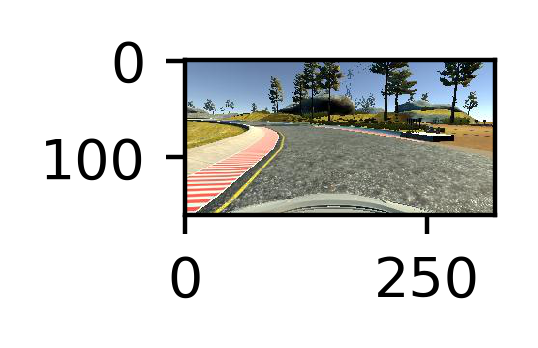

In [83]:
# Visualize the images
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

image = image_array[index]

plt.figure(figsize=(1,1),dpi=400)
plt.imshow(image)
print("Angle of ",angle[index])
print("Image at index: ", index)
print("Image dimensions are ", image.shape)

In [84]:
# Angles not in degress but from -1 to 1 where 1 = 25 degrees
print(angle[index])
print(angle.shape)
print(angle.dtype)

-0.2253692
(1976,)
float64


In [85]:
def normalizer(array, min_max=(0,1), feature_range=(0, 1)):
    x_min = feature_range[0]
    x_max = feature_range[1]
    a = min_max[0]
    b = min_max[1]
    norm_features = (array-x_min)*(b-a)/(x_max - x_min) + a
    return norm_features

## Normalize image channels

I normalized the image channels to between 0 and 1, moving 0 to 0 and 255 to 1

In [56]:
# Normalize the image channels to between 0 and 1
normalized_image_array = normalizer(image_array, min_max=(0,1), feature_range=(0,255))

## Normalize steering angle

I decided to normalize the steering angle to between -0.5 and 0.5 to have a unit spread and a mean of 0.

Steering of -1 correspnds to -25 degrees and 1 +25 degrees.

In [86]:
# Normalize the steering angles to between -0.5 and 0.5. They are currently recorded to between -1.0 and 1.0
angle_nomalized = normalizer(angle, min_max=(-0.5,0.5), feature_range=(-1.0,1.0))
print(min(angle_nomalized))
print(min(angle))
print(angle_nomalized.shape)

-0.18046475
-0.3609295
(1976,)


## Reduce image size
Don't need as many features which will overly complexify the training

In [87]:
from skimage.transform import resize

In [88]:
#skimage.transform.resize(image, output_shape, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
resized_image = resize(image,(80,160))
#resized_image = resize(image,(66,200),cval=0,mode='constant')

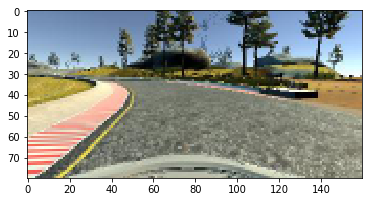

In [89]:
plt.imshow(resized_image)

In [101]:
resized_images = [resize(image,(80,160),preserve_range=True) for image in image_array]
resized_images = np.array(resized_images)
resized_images = np.copy(resized_images).astype('uint8')

<class 'numpy.ndarray'>


numpy.ndarray

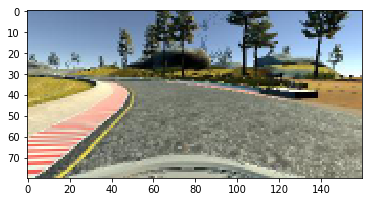

In [102]:
plt.imshow(resized_images[index])
print(type(resized_images))
type(np.array(resized_images))

## Normalize image channels

I normalized the image channels to between 0 and 1, moving 0 to 0 and 255 to 1

In [104]:
# Normalize the image channels to between 0 and 1
normalized_images = normalizer(resized_images, min_max=(0,1), feature_range=(0,255))

In [105]:
print(image_array[0,0,0])
print(resized_images[0,0,20])
print(normalized_images[0,0,0])

[116 145 185]
[106 134 174]
[ 0.45490196  0.56862745  0.7254902 ]
